In [1]:
import sys,os
from tools.tools import save,load,lprint,load_config
from fitlab.resman import RESMAN
import numpy as np
from obslib.sidis.stfuncs import STFUNCS
import matplotlib.patches as mpatches
import pylab as py

# Import parameters from inputs file

In [2]:
conf=load_config('../fitlab/inputs/upol_compass_zeta.py')
conf['resman']=RESMAN(conf)

loading sidis data sets 5002
ogata N= 19


# Import STFUNCS

In [3]:
stfuncs = STFUNCS(conf)
def FUUB(x, z, Q2, b):
    return stfuncs.get_FX_b(1,x,z,Q2,0.0,b,'p','pi+')+stfuncs.get_FX_b(1,x,z,Q2,0.0,b,'n','pi+')


ogata N= 19


# Generate kinematics values matching Alexei's bins

In [4]:
xBin=[0.003,0.008,0.013,0.02,0.032,0.055,0.1,0.21,0.4]
Q2Bin=[1,1.7,3,7,16,81]
xvals = [(xBin[i+1]-xBin[i])/2+xBin[i] for i in range(len(xBin)-1)]
Q2vals = [(Q2Bin[i+1]-Q2Bin[i])/2+Q2Bin[i] for i in range(len(Q2Bin)-1)]
zvals = [0.2, 0.3, 0.4]

# Generate data in kinematic bins

In [5]:
data5001 = {}
for Q2 in Q2vals:
    data5001[str(Q2)] = {}
    for x in xvals:
        data5001[str(Q2)][str(x)] = {}
        for z in zvals:
            data5001[str(Q2)][str(x)][str(z)] = {}
            data5001[str(Q2)][str(x)][str(z)]['bT'] = []
            data5001[str(Q2)][str(x)][str(z)]['FUUB'] = []
            #bT = np.logspace(-1, 1, 5)
            bT = np.linspace(0, 5, 200)
            data5001[str(Q2)][str(x)][str(z)]['bT'] = bT
            data5001[str(Q2)][str(x)][str(z)]['FUUB'] = [b*z**2*FUUB(x, z, Q2, b) for b in bT]

# Plot in bins

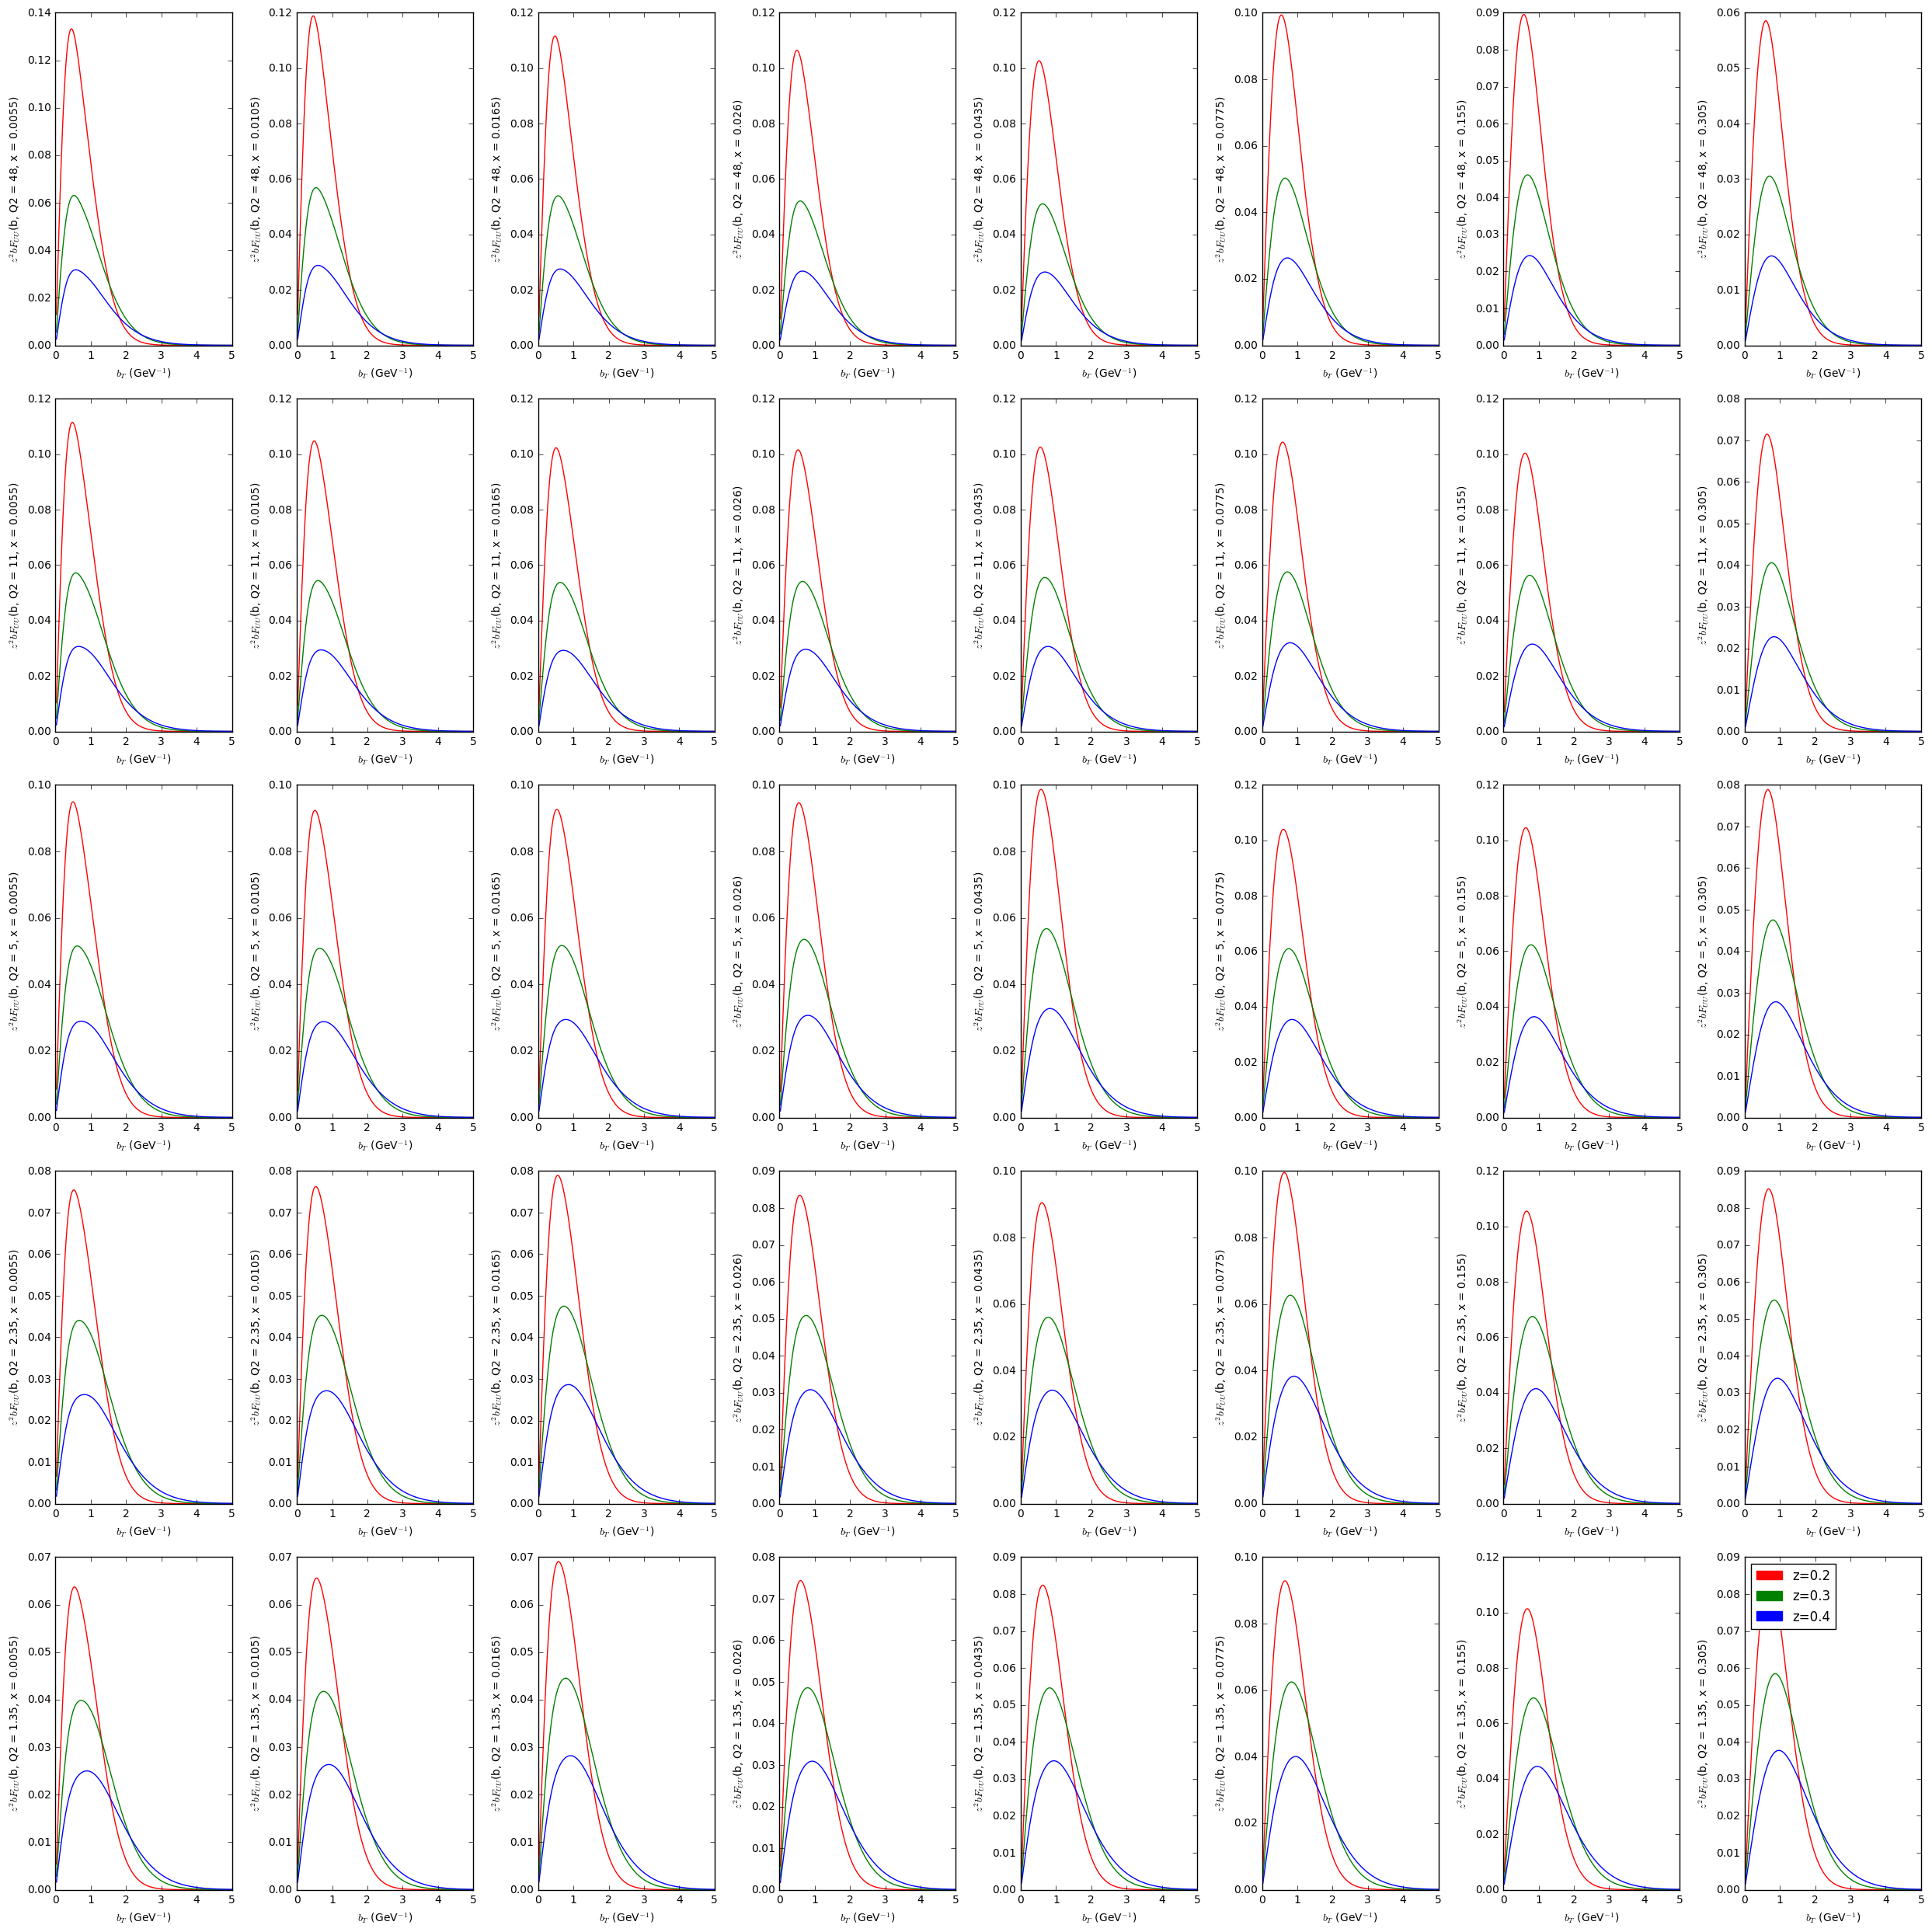

In [8]:
fig=py.figure(figsize=(25, 25))
ax=fig.add_axes([0,0,1,1])
ax.set_yticklabels([0]+Q2Bin)
ax.set_xticklabels([0]+xBin)

# Set legend
Zcolor=["red","green","blue"]
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='z=0.2')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='z=0.3')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='z=0.4')
ax.grid()

k=1 #counter
for Q2 in Q2vals[::-1]:
    for x in xvals:
        datadic = data5001[str(Q2)][str(x)]
        ax = py.subplot(5,8,k)
        for z in zvals:
            if z == 0.2:
                color = 'r-'
            elif z == 0.3:
                color = 'g-'
            elif z == 0.4:
                color = 'b-'
            ax.plot(datadic[str(z)]['bT'],datadic[str(z)]['FUUB'],color)
        ax.legend()
        k+=1 #add one to counter
        ax.set_xlabel(r"$b_T$ (GeV$^{-1}$)")
        ax.set_ylabel(r"$z^2 b F_{UU}$(b, Q2 = " + str(Q2)+", x = "+str(x)+")")
        #ax.semilogx()
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3],loc='upper left')
py.tight_layout()
py.show()
fig.savefig('bt_compass_zeta.pdf')